In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2, l1
import tensorflow.keras.utils as ku
import numpy as np

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2021-02-04 00:14:11--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.208, 172.217.7.144, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-02-04 00:14:12 (96.3 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [6]:
tokenizer = Tokenizer()

data = open('/tmp/sonnets.txt').read()
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# Create input sequences using list of tokens
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictor and label
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]

label = ku.to_categorical(label, num_classes=total_words)

In [17]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=l2(0.03)))
model.add(Dense(total_words, activation='sigmoid'))
adam = Adam(0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense_6 (Dense)              (None, 1605)              322605    
_________________________________________________________________
dense_7 (Dense)              (None, 3211)              5156866   
Total params: 6,422,571
Trainable params: 6,422,571
Non-trainable params: 0
____________________________________________

In [18]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 11s 13ms/step - loss: 7.5395 - accuracy: 0.0208
Epoch 2/100
484/484 [==============================] - 6s 13ms/step - loss: 6.4746 - accuracy: 0.0241
Epoch 3/100
484/484 [==============================] - 6s 13ms/step - loss: 6.3904 - accuracy: 0.0282
Epoch 4/100
484/484 [==============================] - 6s 13ms/step - loss: 6.3501 - accuracy: 0.0279
Epoch 5/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2999 - accuracy: 0.0295
Epoch 6/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2698 - accuracy: 0.0319
Epoch 7/100
484/484 [==============================] - 7s 14ms/step - loss: 6.2222 - accuracy: 0.0331
Epoch 8/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2362 - accuracy: 0.0323
Epoch 9/100
484/484 [==============================] - 6s 13ms/step - loss: 6.2315 - accuracy: 0.0362
Epoch 10/100
484/484 [==============================] - 6s 13ms/step - loss: 6.19

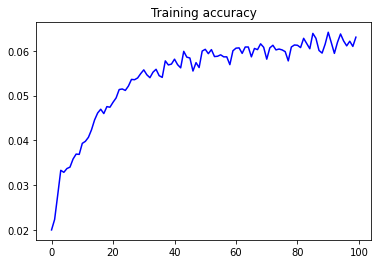

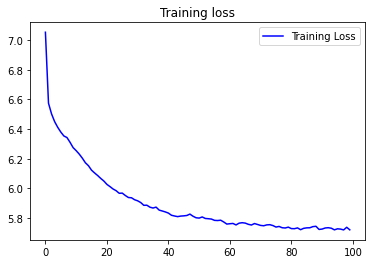

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [19]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict_classes(token_list, verbose=0)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Help me Obi Wan Kenobi, you're my only hope and love in the world and love and love to be a world and love in the world of my love and love and love and love in the world and love in the world and love and love in the world of my love and love and love and love in the world and love in the world and love and love in the world of my love and love and love and love in the world and love in the world and love and love in the world of my love and love and love and love in
